# 심화 학습 : K-평균 군집화

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

## K-평균 소개

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


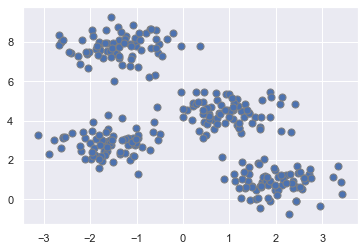

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50, edgecolor = 'gray')

In [3]:
from sklearn.cluster import KMeans
kmeans  = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

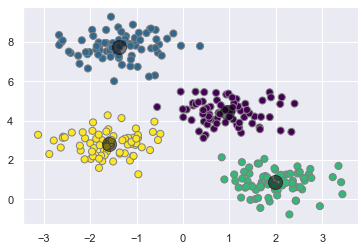

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis', edgecolor = 'gray')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5, edgecolor = 'black')

### K-평균 알고리즘 : 기댓값 - 최대화

1. 일부 군집 중심을 추측한다.
2. 수렴될 때까지 다음을 반복한다.
    * E-단계 : 점을 가장 가까운 군집 중심에 할당한다.
    * M-단계 : 군집 중심을 평균값에 설정한다.

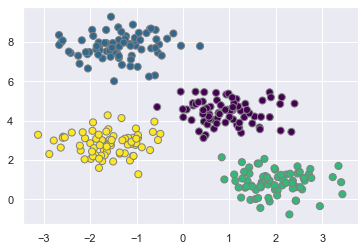

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # 1. 임의로 군집 선택
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. 가장 가까운 중심을 기반으로 레이블 할당
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. 점들의 평균으로부터 새로운 군집 발견
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. 수렴 여부 검사
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis', edgecolor = 'gray')

### 기댓값-최대화 관련 주의사항

<b> 전체적으로 최적화된 결과를 얻을 수 없을지도 모른다.</b>
* E-M 절차는 각 단계의 결과가 개선되는 것은 보장하지만, 전체적으로 최선인 해결책을 얻게되리라는 보장은 없다. 가령 간단한 절차에 다른 난수 초기값을 사용하면 그 특정 초기 추측값으로 인해 만족스럽지 않은 결과를 얻을 수 있다.

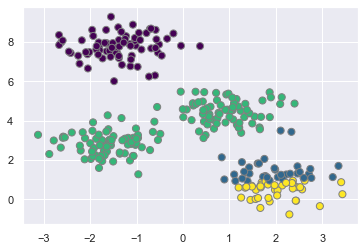

In [6]:
centers, labels = find_clusters(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis', edgecolor = 'gray')

* 이러한 결과 때문에, 여러 개의 초기 추측값으로 실행하는 것이 일반적이며 그에 따라 Scikit-Learn에서도 이를 기본 실행 방식으로 채택하고 있다.

<b>군집의 개수가 사전에 정해져야 한다.</b>
* 얼마나 많은 군집을 예상하는지를 알고리즘에 알려줘야 한다는 문제가 있다. 데이터로부터 군집의 개수를 학습할 수 없기 때문이다. 가령 알고리즘에 여섯 개의 군집을 식별하도록 요청하면 그것은 아무 문제 없이 작업을 수행해 최적의 군집 여섯 개를 구할 것이다.

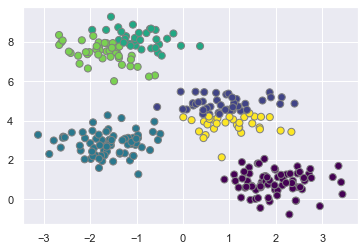

In [7]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis', edgecolor = 'gray')

<b>K-평균은 선형 군집 경계로 한정된다.</b>
* K-평균의 기본 모델 가정(점은 다른 군집의 중심보다 자신이 속한 군집의 중심에 더 가깝다)은 이 알고리즘의 군집이 복잡한 지형도를 갖는 경우에는 종종 비효율적임을 의미한다.
* 특히 K-평균 군집 간의 경계는 언제나 선형이다. 이는 더 복잡한 경계를 갖는 경우 군집화할 수 없다는 뜻이다. 전형적인 K-평균 방식으로 구한 군집 레이블을 가진 다음 데이터를 생각해보자

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = 0.05, random_state = 0)

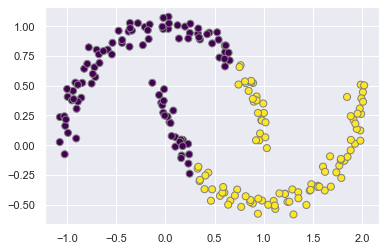

In [9]:
labels = KMeans(2, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis', edgecolor = 'gray')

C:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


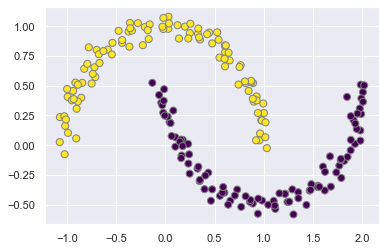

In [10]:
from sklearn.cluster import SpectralClustering as SC
model = SC(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis', edgecolor = 'gray')

<b>K-평균은 표본 수가 많을 때, 느려질 수 있다.</b>
* K-평균 알고리즘은 반복할 때마다 데이터세트의 모든 점에 접근해야 하기 때문에, 표본의 개수가 증가할수록 알고리즘이 상대적으로 느려질 수 있다.
* 이를 해결하기 위한, 배치 기반 K-평균 알고리즘(batch-based k-means algorithms)이 있다.
* 이중 한 버전이 sklearn.cluster.MiniBatchKMeans에 구현돼 있다.

## 예제

### 예제1 : 숫자 데이터에 K-평균 알고리즘 사용하기

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

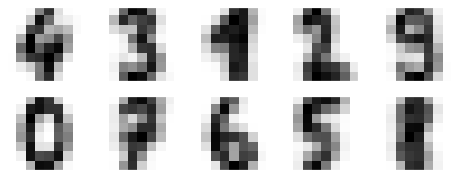

In [13]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [14]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

Text(89.18, 0.5, 'predicted label')

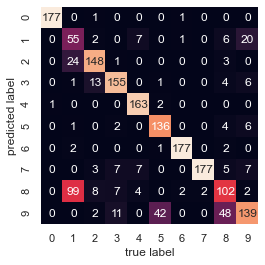

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = digits.target_names, yticklabels = digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
from sklearn.manifold import TSNE
# 데이터 사영 : 이 단계는 시간이 걸린다
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
digits_proj = tsne.fit_transform(digits.data)

# 군집 계산
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits_proj)

# 레이블 바꾸기
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# 정확도 계산
accuracy_score(digits.target, labels)

0.9398998330550918

### 예제2 : 색상 압축에 K-평균 사용하기

In [18]:
pip install pillow

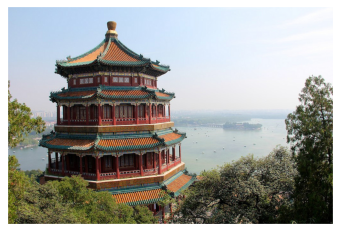

In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china)

In [20]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [21]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
    # 임의의 부분 집합 선택
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    
    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    fig.suptitle(title, size = 20)

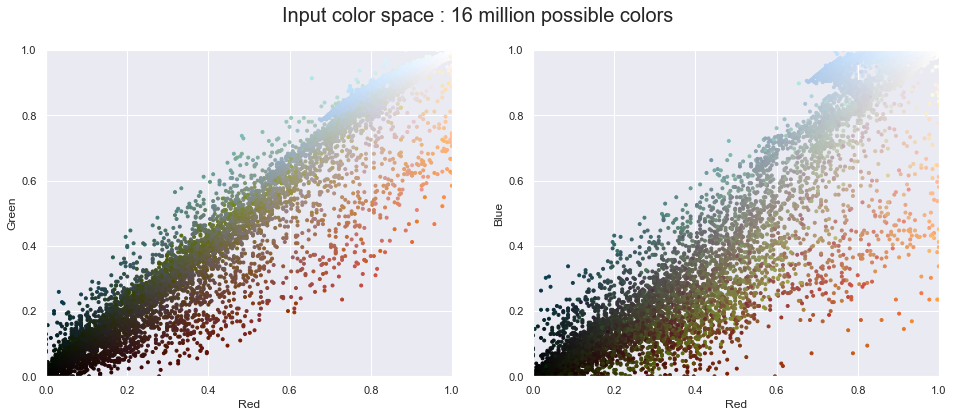

In [22]:
plot_pixels(data, title = 'Input color space : 16 million possible colors')

In [23]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

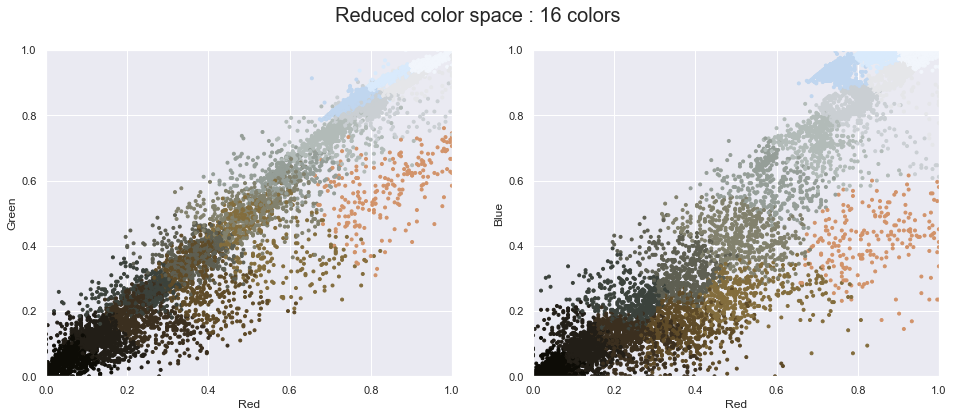

In [24]:
plot_pixels(data, colors = new_colors, title = 'Reduced color space : 16 colors')

Text(0.5, 1.0, '16 color Image')

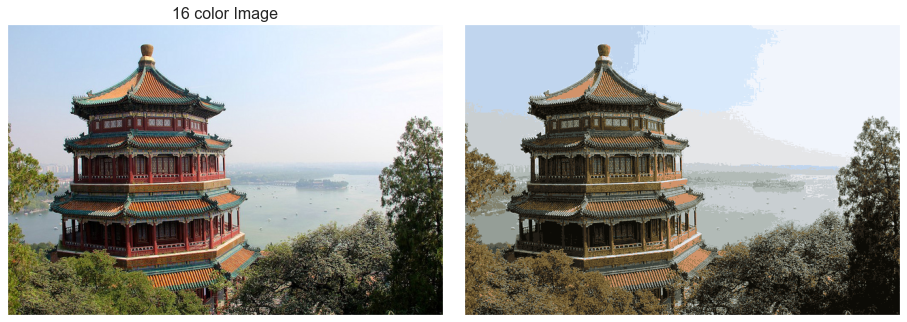

In [25]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)

ax[1].imshow(china_recolored)
ax[0].set_title('16 color Image', size = 16)